Bu kursun içeriği:
1. Bilgisayarların **görmeyi öğrenmesini öğretmeyi** öğrenmek
2. Modern deep-learning ağlarını kullanarak Keras ile resim sınıflandırıcı inşaa etmeyi
4. Yeniden kullanılabilir bloklarla kendi özel konvolüsyon ağınızı (convnet) tasarlayacaksınız
5. Görsel özellik çıkarımının temel fikirlerini öğreneceksiniz
6. Modellerinizi güçlendirmek için transfer öğreniminin sanatında ustalaşacaksınız
7. Veri kümenizi genişletmek için veri artırma (data augmentation) tekniklerini kullanacaksınız

Convnet: "ConvNet" veya Convolutional Neural Network (CNN), derin öğrenmede özellikle görüntü işleme görevlerinde yaygın olarak kullanılan bir sinir ağı türüdür. CNN'ler, görüntülerdeki uzaysal hiyerarşiyi anlamak için konvolüsyon katmanlarını kullanır. Bu katmanlar, bir görüntüdeki özellikleri (örneğin kenarlar, köşeler) tanımlayarak ve daha sonra daha karmaşık desenlere doğru ilerleyerek özellik çıkarımı(feature extraction) yapar.



Bu alandaki en başarılı sinir ağları konvolüsyonel sinir ağlarıdır (ConvNet veya CNN). Konvolüsyon, bu ağların katmanlarına özgü yapıyı kazandıran matematiksel işlemdir ve bilgisayarla görme sorunlarını çözmede oldukça etkilidir.

Kurs, bu fikirleri görüntü sınıflandırma problemlerine uygulayacak; yani, bir fotoğrafın ne olduğunu bir bilgisayara öğretmeyi hedefleyecek. Örneğin, bir bitki türünü fotoğraftan tanımlayabilen uygulamalar, birer görüntü sınıflandırıcıdır. Kurs sonunda, profesyonel uygulamalarda kullanılan kadar güçlü sınıflandırıcılar yapmayı öğreneceksiniz.

Bu kurs esas olarak görüntü sınıflandırmaya odaklanacak olsa da, öğreneceğiniz bilgiler bilgisayarla görme problemlerinin her türü için geçerlidir. Kurs bitiminde, daha ileri seviyedeki üretici adversarial ağlar (GAN) ve görüntü segmentasyonu gibi uygulamalara hazır olacaksınız.

Konvolüsyon(evrişim), görüntülerdeki özellikleri çıkarmak için kullanılan bir matematiksel işlemdir. Küçük filtreler, görüntü üzerinde kaydırılarak yerel özellikler (kenarlar, desenler) yakalanır. Bu sayede sinir ağları, görüntünün önemli detaylarını öğrenir.

Resim sınıflandırma için kullanılan CNN iki parçadan oluşur:
1. a convolutional base
2. a dense head.

![ad](image1.png)

Taban (base): Bir görüntüden özellikleri çıkarmak için kullanılır. Genellikle evrişim işlemi yapan katmanlardan oluşur, ancak başka türde katmanlar da içerebilir.

Baş (head): Görüntünün sınıfını belirlemek için kullanılır. Genellikle yoğun (dense) katmanlardan oluşur, ancak dropout gibi başka katmanları da içerebilir.

Görsel özellik: Bir çizgi, renk, doku, şekil, desen ya da daha karmaşık bir kombinasyon olabilir.

The whole process goes something like this:

![](image2.png)

**Training the Classifier**

Eğitim sırasında ağın amacı iki şeyi öğrenmektir:

1. bir görüntüden (base) hangi özelliklerin çıkarılacağı,
2. hangi sınıf hangi özelliklerle (head) uyumludur.

Günümüzde, convnet'ler nadiren sıfırdan eğitiliyor.(These days, convnets are rarely trained from scratch.) Daha çok, önceden eğitilmiş bir modelin base'i yeniden kullanılıyor. Bu önceden eğitilmiş base'e, eğitilmemiş yeni katmanlar ekleniyor. **Yani, 1. Özellik çıkarma işlemini yapmayı öğrenmiş olan ağın bir kısmını kullanıyor, ardından 2. Sınıflandırmayı öğrenmek için yeni katmanlar ekliyoruz.**

![](image3.png)

Head kısmı genellikle sadece birkaç dense katmandan oluştuğu için, nispeten az veriyle oldukça doğru sınıflandırıcılar oluşturulabilir.

Önceden eğitilmiş bir modeli yeniden kullanma tekniğine transfer öğrenimi (transfer learning) denir. Bu yöntem o kadar etkilidir ki, günümüzde neredeyse her görüntü sınıflandırıcısı bunu kullanır.

**Örnek - Bir Convnet Sınıflandırıcı Eğitme**

Throughout this course, we're going to be creating classifiers that attempt to solve the following problem: is this a picture of a Car or of a Truck? Our dataset is about 10,000 pictures of various automobiles, around half cars and half trucks.

In [18]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/Data-Science-and-Machine-Learning-Tutorial/Datasets/archive/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/Data-Science-and-Machine-Learning-Tutorial/Datasets/archive/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5117 files belonging to 2 classes.


In [19]:
import matplotlib.pyplot as plt

Ön eğitim için en sık kullanılan veri seti, birçok türde doğal görüntüler içeren büyük bir veri seti olan ImageNet’tir. Keras, uygulamalar modülünde ImageNet üzerinde önceden eğitilmiş çeşitli modeller içerir. Kullanacağımız önceden eğitilmiş model ise VGG16 olarak adlandırılır.

In [20]:
from tensorflow.keras.applications import VGG16

# Pretrained model yükleniyor
pretrained_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modelin ağırlıkları eğitilmeyecek (dondurulacak)
pretrained_base.trainable = False
# Transfer learning yaparken, genellikle tüm base'i yeniden eğitmek iyi bir fikir değildir - en azından dikkatli olmadan. 
# Bunun nedeni, head'deki rastgele weight'lerin başlangıçta büyük gradient güncellemeleri oluşturmasıdır. 
# Bu güncellemeler base layer'lara geri yayılarak önceki eğitimin çoğunu bozabilir. 
# Fine tuning olarak bilinen tekniklerle base'i yeni verilerle daha fazla eğitmek mümkündür, ancak bunu iyi yapmak için dikkatli olmak gerekir.

Sonraki adımda, sınıflandırıcı kısmını (classifier head) ekleyeceğiz. Bu örnekte, önce gizli birimler (ilk Dense katman) içeren bir katman, ardından çıktıları class 1 (Kamyon) için bir olasılık skoruna dönüştürecek bir katman kullanacağız. Flatten katmanı, tabanın iki boyutlu çıktısını, sınıflandırıcı kısmının ihtiyacı olan tek boyutlu girdiye dönüştürür.

In [21]:
from tensorflow.keras import layers, models

# Yeni modelimizi oluşturuyoruz
model = models.Sequential([
    pretrained_base,                # Önceden eğitilmiş VGG16 tabanı
    layers.Flatten(),               # Çıktıları tek boyuta düzleştirir
    layers.Dense(128, activation='relu'),  # Gizli katman
    layers.Dense(1, activation='sigmoid')  # Son katman: Kamyon olasılığı
])

# Modeli derleyin

# Keras'ta bir model eğitmeden önce, gradient descent'i gerçekleştirecek bir optimizer, 
# minimize edilecek bir loss function ve (isteğe bağlı olarak) performans metric'leri belirlemeniz gerekir. 
# Bu kurs için kullanacağımız optimization algoritması "Adam"dır ve genellikle problem türünden bağımsız olarak iyi performans gösterir.
# Ancak loss ve metric'ler, çözmeye çalıştığınız problem türüne uygun olmalıdır. 
# Bizim problemimiz bir binary classification problemidir: Araba 0, Kamyon 1 olarak kodlanmıştır. 
# Binary classification için uygun bir loss ve uygun bir accuracy metric seçin.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy']) # veya binary_accuracy

Son olarak, modeli eğitelim. İki sınıflı bir problem olduğu için, binary crossentropy ve accuracy metriklerini kullanacağız. Adam optimizasyonu genellikle iyi sonuçlar verdiği için onu tercih edeceğiz.

In [22]:
import tensorflow as tf

# Görüntüleri 224x224 boyutuna yeniden boyutlandıran bir fonksiyon
def resize_images(image, label):
    image = tf.image.resize(image, (224, 224))
    return image, label

# Eğitim ve doğrulama veri setlerini yeniden boyutlandırma
ds_train = ds_train.map(resize_images)
ds_valid = ds_valid.map(resize_images)

# Modeli eğitme
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=2, # burda 50 gibi yüksek sayılar yazmalı
    verbose=2,
)

Epoch 1/2
80/80 - 727s - 9s/step - binary_accuracy: 0.7428 - loss: 0.6421 - val_binary_accuracy: 0.8949 - val_loss: 0.3039
Epoch 2/2
80/80 - 731s - 9s/step - binary_accuracy: 0.8978 - loss: 0.2768 - val_binary_accuracy: 0.9361 - val_loss: 0.2118


Bir sinir ağı eğitirken, kayıp ve metrik grafikleri incelemek her zaman iyi bir fikirdir. history nesnesi, bu bilgileri içeren bir sözlük olan history.history'yi barındırır. Bu sözlüğü Pandas kullanarak bir DataFrame'e dönüştürebilir ve yerleşik bir yöntemle grafik olarak çizebiliriz.

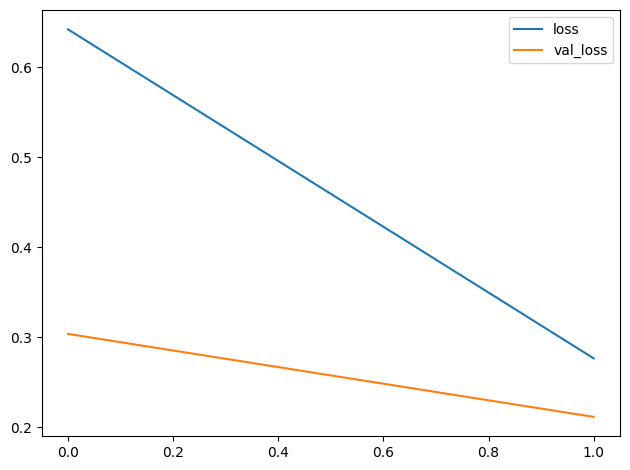

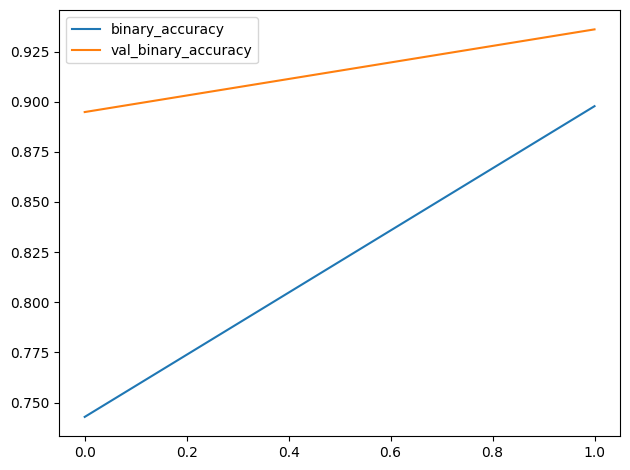

In [23]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

Bu derste, bir convnet sınıflandırıcısının yapısını öğrendik: özellik çıkarımı yapan bir tabanın üzerinde sınıflandırıcı olarak görev yapan bir baş kısmı.

Baş kısmı, temelde tanıtım kursunda öğrendiğin sıradan bir sınıflandırıcıdır. Özellikler için, tabanın çıkardığı özellikleri kullanır. Konvolüsyonel sınıflandırıcıların temel fikri budur: özellik mühendisliği yapan bir birimi doğrudan sınıflandırıcıya ekleyebilmek.

Bu, derin sinir ağlarının geleneksel makine öğrenimi modellerine göre sahip olduğu büyük avantajlardan biridir: doğru ağ yapısı ile derin sinir ağı, sorununu çözmek için ihtiyaç duyduğu özellikleri mühendislik yapmayı öğrenebilir.

Sonraki birkaç derste, konvolüsyonel tabanın nasıl özellik çıkarımı gerçekleştirdiğine bakacağız. Ardından, bu fikirleri uygulamayı ve kendi sınıflandırıcılarını tasarlamayı öğreneceksin.

Bu derste, önceden eğitilmiş bir base'e dense layer'lardan oluşan bir head ekleyerek bir image classifier oluşturmayı gördük. Kullandığımız base, VGG16 adlı bir modeldendi. VGG16 mimarisinin bu dataset için overfitting'e eğilimli olduğunu gördük. Bu kurs boyunca, bu ilk denemeyi iyileştirmenin çeşitli yollarını öğreneceksiniz.

Göreceğiniz ilk yol, dataset'e daha uygun bir base kullanmak olacak. Bu modelin geldiği base, InceptionV1 (GoogLeNet olarak da bilinir) olarak adlandırılır. InceptionV1, ImageNet yarışmasının ilk kazananlarından biriydi. Ardıllarından biri olan InceptionV4, bugün state of the art'lar arasındadır.

# Conclusion

Bu ilk derste, convolutional image classifier'ların temellerini öğrendiniz. Bunların, görüntülerden feature'lar çıkaran bir base ve bu feature'ları kullanarak görüntünün sınıfını belirleyen bir head'den oluştuğunu gördünüz. Ayrıca, önceden eğitilmiş bir base üzerinde transfer learning kullanarak nasıl bir classifier oluşturulacağını da gördünüz.